In [57]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
string.punctuation
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
data = pd.read_csv('/content/founta_dataset.csv', sep='\t', header=None)
data.head()

0        1  2
0  Beats by Dr. Dre urBeats Wired In-Ear Headphon...     spam  4
1  RT @Papapishu: Man it would fucking rule if we...  abusive  4
2  It is time to draw close to Him &#128591;&#127...   normal  4
3  if you notice me start to act different or dis...   normal  5
4  Forget unfollowers, I believe in growing. 7 ne...   normal  3

In [59]:
data.index.name = 'ID'
data.columns = ['text', 'class', 'votes']
data.head()

text    class  votes
ID                                                                   
0   Beats by Dr. Dre urBeats Wired In-Ear Headphon...     spam      4
1   RT @Papapishu: Man it would fucking rule if we...  abusive      4
2   It is time to draw close to Him &#128591;&#127...   normal      4
3   if you notice me start to act different or dis...   normal      5
4   Forget unfollowers, I believe in growing. 7 ne...   normal      3

In [60]:
data.describe()

votes
count  99996.000000
mean       3.690388
std        1.066968
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max       43.000000

In [61]:
# percentile list
perc =[.20, .40, .60, .80]
data.dropna(inplace = True) 
  
# list of dtypes to include
include =['object', 'float', 'int']
data.describe(percentiles = perc, include = include)

text   class         votes
count                                               99996   99996  99996.000000
unique                                              91951       4           NaN
top     RT @13ReasonsFans: this fucked me up https://t...  normal           NaN
freq                                                  219   53851           NaN
mean                                                  NaN     NaN      3.690388
std                                                   NaN     NaN      1.066968
min                                                   NaN     NaN      1.000000
20%                                                   NaN     NaN      3.000000
40%                                                   NaN     NaN      3.000000
50%                                                   NaN     NaN      4.000000
60%                                                   NaN     NaN      4.000000
80%                                                   NaN     NaN      5.000000
max                                                   NaN     NaN     43.000000

In [62]:
data["class"].describe()

count      99996
unique         4
top       normal
freq       53851
Name: class, dtype: object

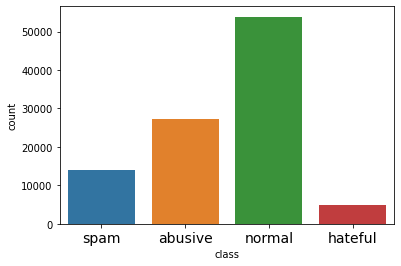

In [63]:
#plot the class distribution
small_size = 14
plt.rc('xtick', labelsize=small_size)  
sns.countplot(x='class',data=data)

In [64]:
print("This is neutral language")
normal = data[data['class']=='normal']
normal.head()

This is neutral language


text   class  votes
ID                                                                  
2   It is time to draw close to Him &#128591;&#127...  normal      4
3   if you notice me start to act different or dis...  normal      5
4   Forget unfollowers, I believe in growing. 7 ne...  normal      3
6   Topped the group in TGP Disc Jam Season 2! Ont...  normal      3
7   That daily baby aspirin for your #heart just m...  normal      5

In [65]:
print("This is spam")
spam = data[data['class']=='spam']
spam.head()

This is spam


text class  votes
ID                                                                
0   Beats by Dr. Dre urBeats Wired In-Ear Headphon...  spam      4
10  Uber finds one allegedly stolen Waymo file – o...  spam      3
26  4X DIY Birds Stencil Cutting Carbon Scrapbooki...  spam      3
35  one person followed me and 2 people unfollowed...  spam      7
49  #Farmville2 Giveaway Saturday Gifts (April 8, ...  spam      4

In [66]:
print("This is abusive language")
abusive = data[data['class']=='abusive']
abusive.head()

This is abusive language


text    class  votes
ID                                                                   
1   RT @Papapishu: Man it would fucking rule if we...  abusive      4
5   RT @Vitiligoprince: Hate Being sexually Frustr...  abusive      4
9   RT @LestuhGang_: If your fucking up &amp; your...  abusive      4
12  RT @ennoia3: That's one way he pulls you in RT...  abusive      4
13  Spotify is fucking with me https://t.co/lkYGXO...  abusive      4

In [67]:
print("This is hate speech")
hs = data[data['class']=='hateful']
hs.head()

This is hate speech


text    class  votes
ID                                                                    
21   Bad day for #Kyrgyzstan. Suspect in St. Peters...  hateful      2
34   I'm over the fucking moon we've cleared up the...  hateful      3
37   RT @ynaoivw: nah bitch i hate u https://t.co/f...  hateful      3
71   RT @WaysThingsWork: I fucking hate people &#12...  hateful      3
106  @VanJones68 You looked like a complete patheti...  hateful      3

4965
Hate speech keywords:



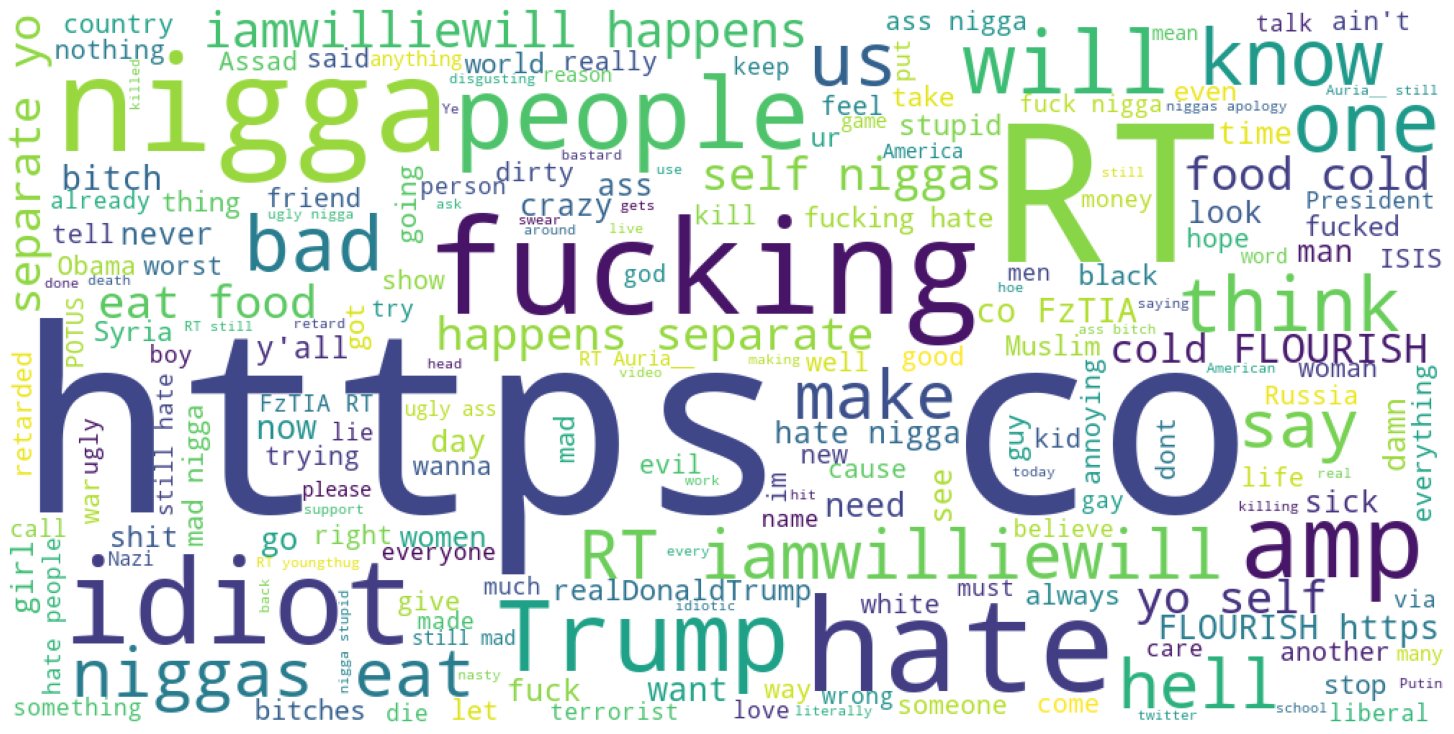

In [68]:
sentences = hs['text'].tolist()
print(len(sentences))

sentences_as_one_string = " ".join(sentences)
print("Hate speech keywords:")
print("")
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Abusive keywords:



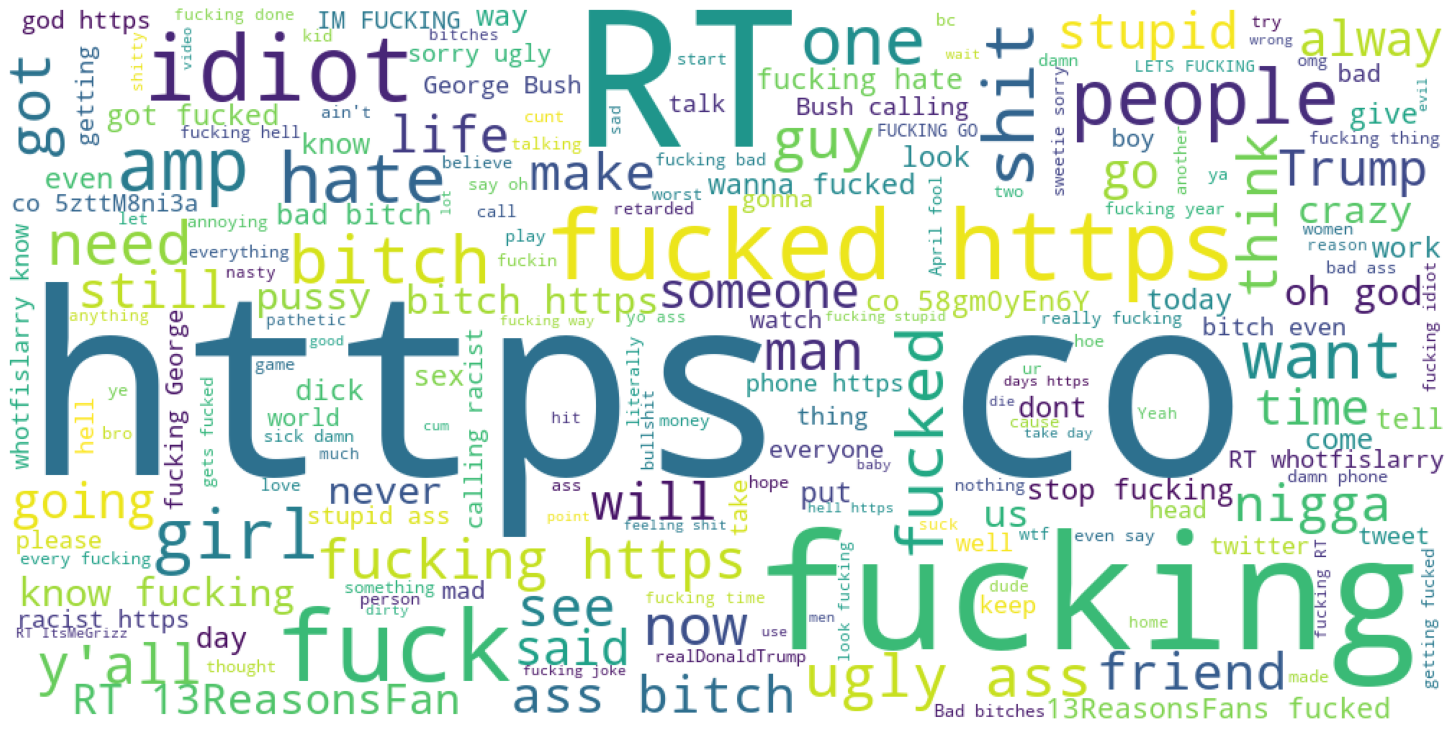

In [69]:
sentences = abusive['text'].tolist()
len(sentences)
print("Abusive keywords:")
print("")
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Neutral keywords:



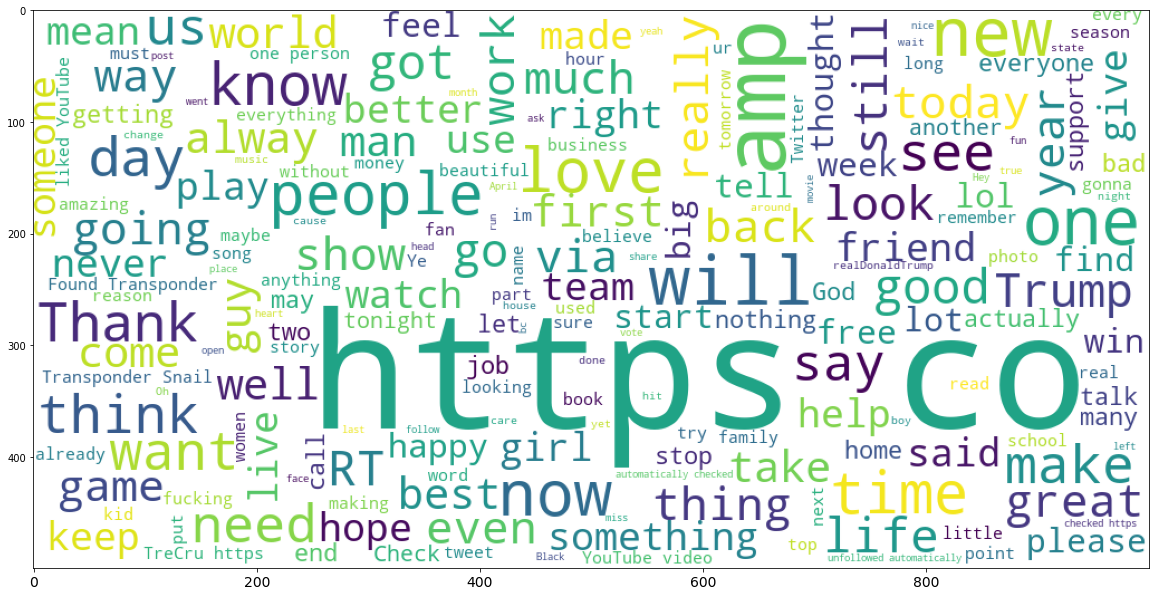

In [70]:
sentences = normal['text'].tolist()
len(sentences)
print("Neutral keywords:")
print("")
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))


Spam keywords:



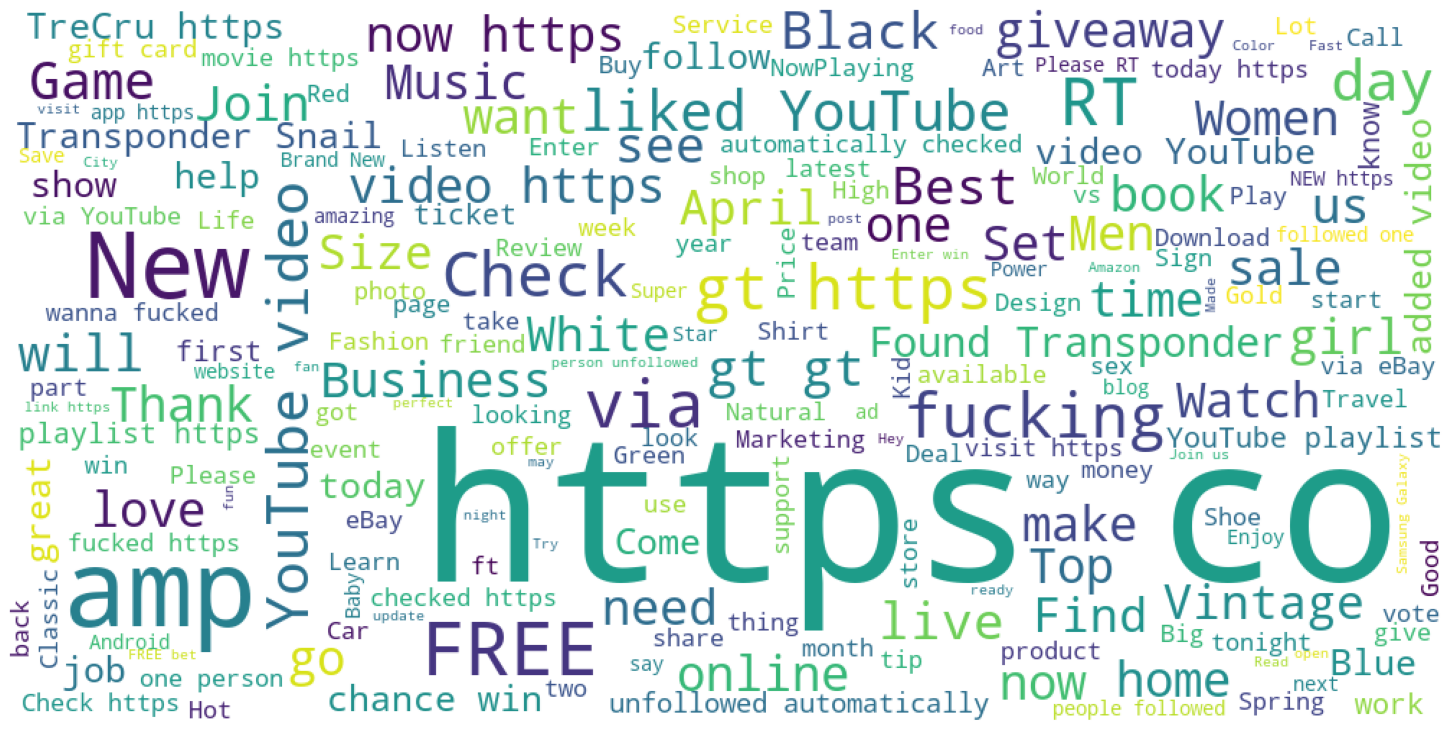

In [71]:
sentences = spam['text'].tolist()
len(sentences)
sentences_as_one_string = " ".join(sentences)
print("Spam keywords:")
print("")
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [72]:
# Define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    Test_punc_removed_join_clean_join = ' '.join(Test_punc_removed_join_clean)
    return Test_punc_removed_join_clean_join


In [73]:
# Create a new Dataframe for cleaned text
data_clean = pd.DataFrame(columns=['class', 'text'])
data_clean['text'] = data['text'].apply(message_cleaning)
data_clean['class'] = data['class']
data_clean.head()

class                                               text
ID                                                            
0      spam  Beats Dr Dre urBeats Wired InEar Headphones Wh...
1   abusive  RT Papapishu Man would fucking rule party perp...
2    normal  time draw close 128591127995 Father draw near ...
3    normal  notice start act different distant bc peeped s...
4    normal  Forget unfollowers believe growing 7 new follo...

In [74]:
print("Original version:")
print(data['text'][5]) 
print("Cleaned:")
print(data_clean['text'][5]) 

Original version:
RT @Vitiligoprince: Hate Being sexually Frustrated Like I wanna Fuck But ion wanna Just fuck anybody
Cleaned:
RT Vitiligoprince Hate sexually Frustrated Like wanna Fuck ion wanna fuck anybody


4965
Hate speech keywords:



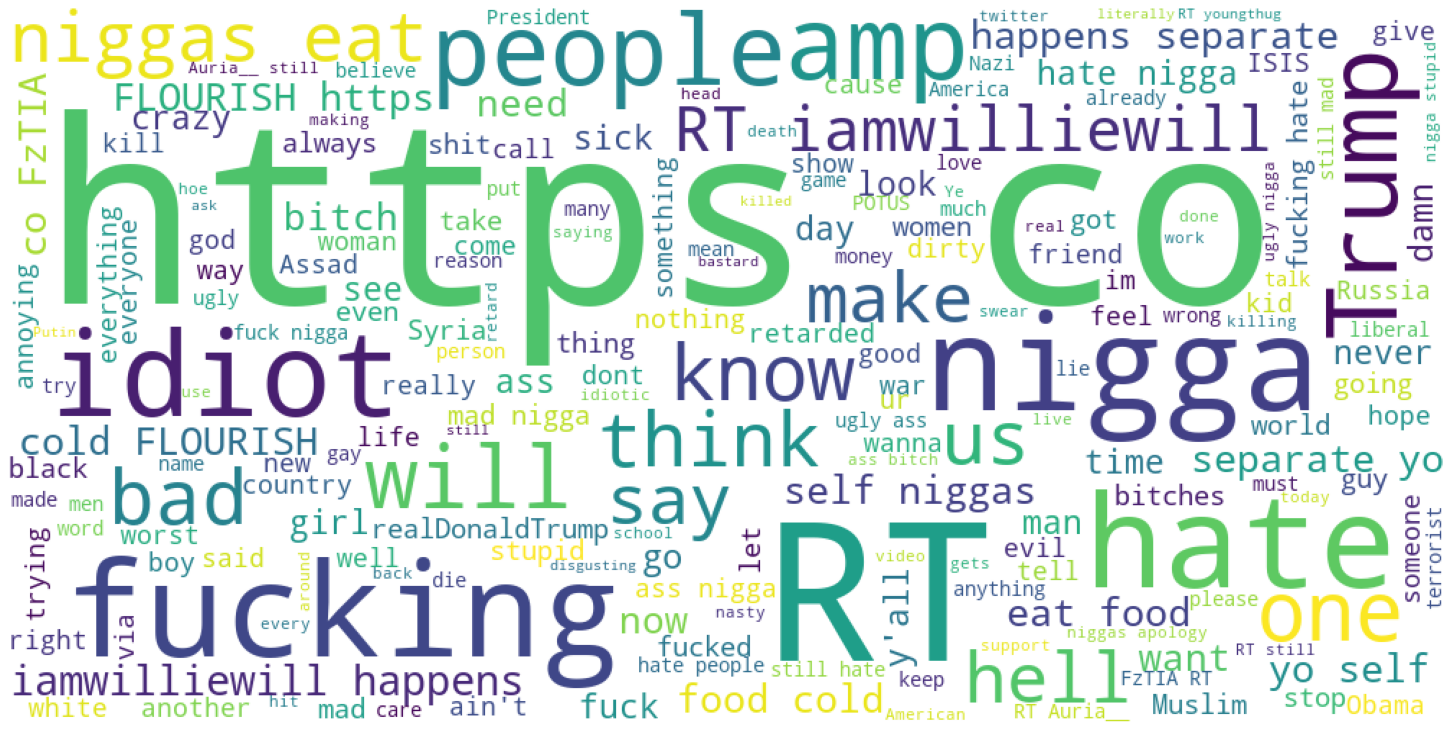

In [75]:
sentences = hs['text'].tolist()
print(len(sentences))

sentences_as_one_string = " ".join(sentences)
print("Hate speech keywords:")
print("")
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()